# Lidl Analytics - Consulting Case Study

#### Author: Jonathan Ulrich

#### Date: 01.09.2020

## Index

### (1) Setup
### (2) Data Preperation
### (3) Data Analysis
    (3.1) Data Visualization and Exploration
    (3.2) Multiple Linear Regression Model
    (3.3) Correlation Analysis
    (3.4) K-means Clustering

## (1) Setup

In [1]:
import numpy as np
import pandas as pd

import math

import seaborn as sns

%matplotlib inline
import matplotlib.pyplot as plt

import statsmodels.api as sm

from scipy import stats

from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import mean_squared_error

## (2) Data Preparation

In [2]:
#Loading data from github
url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/candy-power-ranking/candy-data.csv'
df = pd.read_csv(url, index_col=0)


In [3]:
#Checking data for missing values
if sum((df.isnull().sum()/len(df)*100).sort_values(ascending=False)) == 0:
    print('No Null values!')
    
else:
    print('Null values!')

No Null values!


In [4]:
#Checking for competitors with no ingredients
df_noing = df[df[['chocolate','fruity','caramel', 'peanutyalmondy', 'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus']].sum(axis=1) == 0]

print(df_noing)


                chocolate  fruity  caramel  peanutyalmondy  nougat  \
competitorname                                                       
One dime                0       0        0               0       0   
One quarter             0       0        0               0       0   

                crispedricewafer  hard  bar  pluribus  sugarpercent  \
competitorname                                                        
One dime                       0     0    0         0         0.011   
One quarter                    0     0    0         0         0.011   

                pricepercent  winpercent  
competitorname                            
One dime               0.116   32.261086  
One quarter            0.511   46.116505  


In [5]:
#Dropping dime and quarter
df = df.drop(['One dime', 'One quarter'])

In [6]:
#Creating New Metrics for Number of Ingredients
df['number ingredients'] = df[['chocolate','fruity','caramel', 'peanutyalmondy', 'nougat', 'crispedricewafer', 'hard', 'bar']].sum(axis=1)

#Changing the metric pricepercent into € by recalculating value assuming one quarter = 0.25€
df['pricepercent'] = (df['pricepercent']/0.511)*0.25

#Renaming column to price
df = df.rename(columns={'pricepercent': 'price'})

## (3) Data Analysis

### (3.1) Data Exploration

In [7]:
#Data exploration (1)
print(df.head())

                chocolate  fruity  caramel  peanutyalmondy  nougat  \
competitorname                                                       
100 Grand               1       0        1               0       0   
3 Musketeers            1       0        0               0       1   
Air Heads               0       1        0               0       0   
Almond Joy              1       0        0               1       0   
Baby Ruth               1       0        1               1       1   

                crispedricewafer  hard  bar  pluribus  sugarpercent     price  \
competitorname                                                                  
100 Grand                      1     0    1         0         0.732  0.420744   
3 Musketeers                   0     0    1         0         0.604  0.250000   
Air Heads                      0     0    0         0         0.906  0.250000   
Almond Joy                     0     0    1         0         0.465  0.375245   
Baby Ruth              

In [8]:
#Data exploration (2)
print (df.shape)

(83, 13)


In [9]:
#Data exploration (3)
df.describe()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,price,winpercent,number ingredients
count,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000
mean,0.445783,0.457831,0.168675,0.168675,0.084337,0.084337,0.180723,0.253012,0.530120,0.489916,0.231226,50.584908,1.843373
std,0.500073,0.501247,0.376741,0.376741,0.279582,0.279582,0.387128,0.437381,0.502126,0.276498,0.140168,14.748880,1.098579
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.034000,0.005382,22.445341,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.267000,0.127691,39.163280,1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.465000,0.227495,48.982651,2.000000
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,1.000000,0.732000,0.343933,60.332349,2.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.988000,0.477495,84.180290,5.000000


In [10]:
#Data exploration (4)
df.sum(axis=0)

chocolate               37.000000
fruity                  38.000000
caramel                 14.000000
peanutyalmondy          14.000000
nougat                   7.000000
crispedricewafer         7.000000
hard                    15.000000
bar                     21.000000
pluribus                44.000000
sugarpercent            40.662999
price                   19.191781
winpercent            4198.547333
number ingredients     153.000000
dtype: float64

In [11]:
#Having a look at top scoring products
df_max= df.sort_values(by=['winpercent'], ascending=False)
df_max.head(5)

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,price,winpercent,number ingredients
competitorname,,,,,,,,,,,,,
ReeseÕs Peanut Butter cup,1,0,0,1,0,0,0,0,0,0.720,0.318493,84.180290,2
ReeseÕs Miniatures,1,0,0,1,0,0,0,0,0,0.034,0.136497,81.866257,2
Twix,1,0,1,0,0,1,0,1,0,0.546,0.443249,81.642914,4
Kit Kat,1,0,0,0,0,1,0,1,0,0.313,0.250000,76.768600,3
Snickers,1,0,1,1,1,0,0,1,0,0.546,0.318493,76.673782,5


In [12]:
#Calculating sum of attributes of candy
Z = df[['chocolate','fruity','caramel', 'peanutyalmondy', 'nougat', 'crispedricewafer', 'hard', 'bar','pluribus']]
sum = Z.sum()

In [13]:
#Calculating average values of binary attributes 
Attributes = list(Z.columns.values)
avgwinlist = []

for a in range(len(Attributes)):
    dfa = df[df[Attributes[a]] == 1]
    avg = dfa['winpercent'].mean(axis=0)
    avg = round(avg,2)
    avgwinlist.append(avg)




In [14]:
#Creating df_explore, assigning columns and integrating averagewinlist
df_explore = pd.DataFrame(sum)
df_explore.columns = ['Anzahl an Süßigkeiten mit Eigenschaft']
df_explore['Anzahl an Süßigkeiten ohne Eigenschaft'] = 83 - df_explore['Anzahl an Süßigkeiten mit Eigenschaft']
df_explore['% Anteil an Süßigkeiten mit Eigenschaft'] = ((df_explore['Anzahl an Süßigkeiten mit Eigenschaft'] / 83) * 100).round(decimals=1)
df_explore = df_explore.assign(Gewinnrate = avgwinlist)


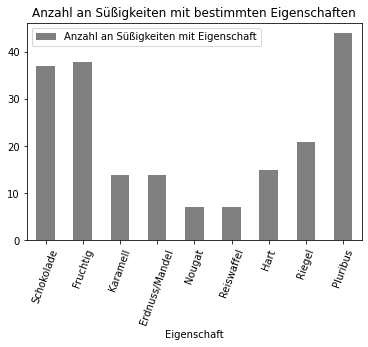

In [15]:
#Renaming Columns of df_explore and setting index to be a column
df_explore = df_explore.rename(index={'chocolate': 'Schokolade', 'fruity':'Fruchtig', 'caramel':'Karamell', 'peanutyalmondy': 'Erdnuss/Mandel', 'nougat':'Nougat', 'crispedricewafer':'Reiswaffel', 'hard':'Hart', 'bar':'Riegel', 'pluribus':'Pluribus', 'avgwinpercent':'Durchschnittliche Gewinnrate'})
df_explore = df_explore.reset_index()
df_explore.rename(columns={'index':'Eigenschaft'},inplace=True)
 
#Plotting number of sweets that have each attribute
df_explore.plot.bar(x="Eigenschaft", y="Anzahl an Süßigkeiten mit Eigenschaft", rot=70, title="Anzahl an Süßigkeiten mit bestimmten Eigenschaften", color='grey');

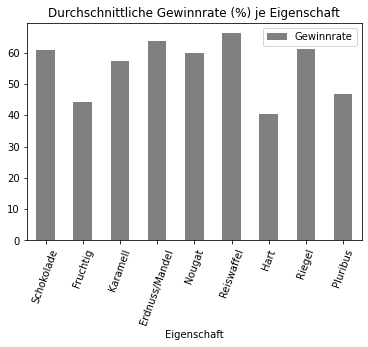

In [16]:
#Plot average winrate                                    
df_explore.plot.bar(x="Eigenschaft", y="Gewinnrate", rot=70, title="Durchschnittliche Gewinnrate (%) je Eigenschaft", color='grey');

### (3.2) Multiple Linear Regression Model

In [17]:
#Building linear regression model
lm = LinearRegression()

In [18]:
# Defining winpercent as Response Variable
y = df['winpercent']

In [19]:
#Defining predictor variables for multiple linear regression model
Z = df[['chocolate','fruity','caramel', 'peanutyalmondy', 'nougat', 'crispedricewafer', 'hard', 'bar','pluribus']]
W = df[[ 'sugarpercent', 'price', 'number ingredients', 'pluribus']]
X = df[['chocolate','fruity','caramel', 'peanutyalmondy', 'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus', 'sugarpercent', 'price', 'number ingredients' ]]
N = df[['chocolate','fruity','caramel', 'peanutyalmondy', 'nougat', 'crispedricewafer', 'hard', 'bar','winpercent']]

In [20]:
#Add column of ones to array to calculate constant
X2 = sm.add_constant(Z) 

#Creating Multiple Linear Regression Model with Ordinary Least Squares Method
#MLRS for binary attributes
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:             winpercent   R-squared:                       0.513
Model:                            OLS   Adj. R-squared:                  0.453
Method:                 Least Squares   F-statistic:                     8.558
Date:                Tue, 01 Sep 2020   Prob (F-statistic):           1.26e-08
Time:                        22:56:55   Log-Likelihood:                -310.74
No. Observations:                  83   AIC:                             641.5
Df Residuals:                      73   BIC:                             665.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               33.3706      4.841  

In [21]:
#Add column of ones to array to calculate constant
X2 = sm.add_constant(W)

#Creating Multiple Linear Regression Model with Ordinary Least Squares Method
#MLRS for non-binary attributes
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:             winpercent   R-squared:                       0.271
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     7.258
Date:                Tue, 01 Sep 2020   Prob (F-statistic):           5.07e-05
Time:                        22:56:56   Log-Likelihood:                -327.51
No. Observations:                  83   AIC:                             665.0
Df Residuals:                      78   BIC:                             677.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 34.3816      4

In [22]:
#Redefining X
X = Z

#Fitting linear model to variables.
lm.fit(X, y)

#Prediction of winpercentage through multiple linear regression model
Yhat = lm.predict(X)

#Define coefficients in multiple linear regression model
c = lm.coef_
b = lm.intercept_

#Calculation of r2 to evaluate strength of relationship
r2 = lm.score(X, df['winpercent'])

#Calculate mse and square-root mse
mse = mean_squared_error(df['winpercent'], Yhat)
msesqrt = math.sqrt(mse)

print('r2 = ' , r2)
print('mse = ', mse)
print('msesqrt = ', msesqrt)

r2 =  0.5134035516572544
mse =  104.57377974880045
msesqrt =  10.226132198871696


In [23]:
#Appending df_explore from data exploration for integrated view of binary attributes
df_explore = df_explore.assign(Coefficient = c.round(2)/100)
df_explore= df_explore.sort_values(by=['Coefficient'], ascending=False)

C:\Users\jonat\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1330: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


[Text(0, 0, 'Schokolade'),
 Text(0, 0, 'Fruchtig'),
 Text(0, 0, 'Erdnuss/Mandel'),
 Text(0, 0, 'Reiswaffel'),
 Text(0, 0, 'Karamell'),
 Text(0, 0, 'Nougat'),
 Text(0, 0, 'Pluribus'),
 Text(0, 0, 'Riegel'),
 Text(0, 0, 'Hart')]

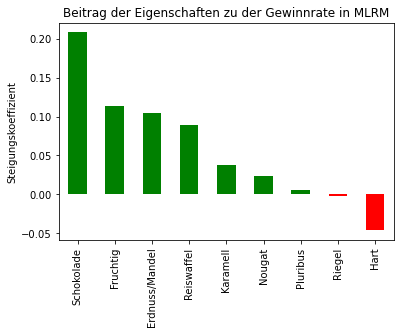

In [24]:
#Visualization of contribution to winpercent (coefficient) in bar chart

#Add to x-label and y-label to the plot
plt.ylabel('Steigungskoeffizient') 

#Plot title
plt.title('Beitrag der Eigenschaften zu der Gewinnrate in MLRM')

#Plotting Data
df_explore['Coefficient'].plot(kind='bar', color=(df_explore['Coefficient'] > 0).map({True: 'G',False: 'r'})).set_xticklabels(df_explore['Eigenschaft'])

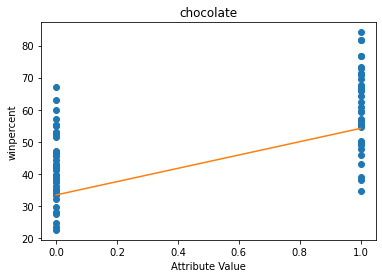

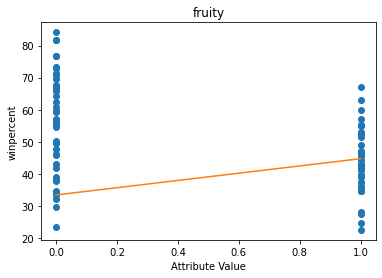

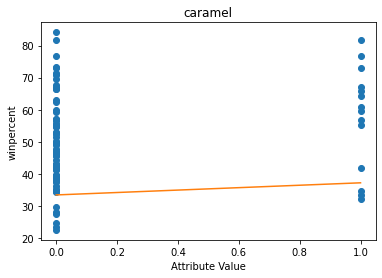

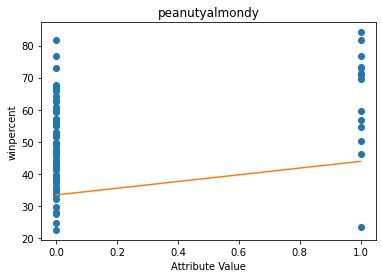

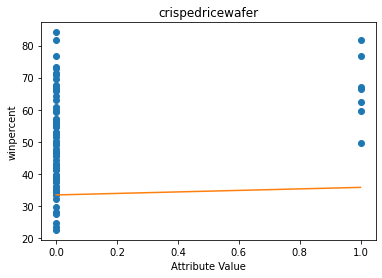

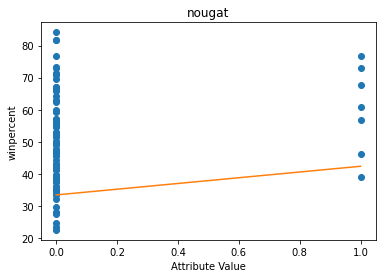

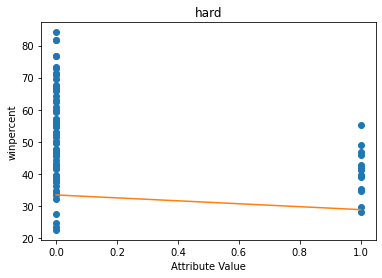

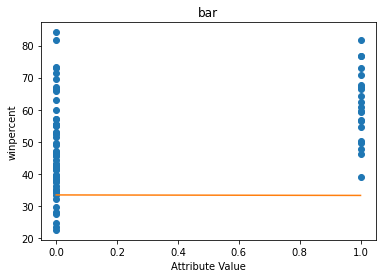

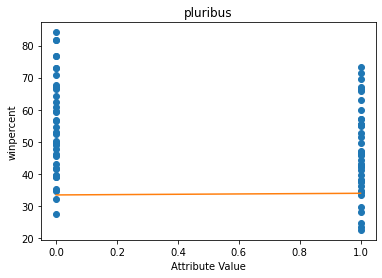

In [25]:
# Plotting data and regression for each ingredient attribute
plt.plot(df['chocolate'].to_numpy(),df['winpercent'].to_numpy(),ls='',marker='o')
x_plot=np.linspace(0,1,100)
plt.plot(x_plot,(lambda x:c[0]*x + b)(x_plot).reshape(-1))
plt.title('chocolate')
plt.xlabel('Attribute Value')
plt.ylabel('winpercent')
plt.show()

plt.plot(df['fruity'].to_numpy(),df['winpercent'].to_numpy(),ls='',marker='o')
x_plot=np.linspace(0,1,100)
plt.plot(x_plot,(lambda x:c[1]*x + b)(x_plot).reshape(-1))
plt.title('fruity')
plt.xlabel('Attribute Value')
plt.ylabel('winpercent')
plt.show()

plt.plot(df['caramel'].to_numpy(),df['winpercent'].to_numpy(),ls='',marker='o')
x_plot=np.linspace(0,1,100)
plt.plot(x_plot,(lambda x:c[2]*x + b)(x_plot).reshape(-1))
plt.title('caramel')
plt.xlabel('Attribute Value')
plt.ylabel('winpercent')
plt.show()

plt.plot(df['peanutyalmondy'].to_numpy(),df['winpercent'].to_numpy(),ls='',marker='o')
x_plot=np.linspace(0,1,100)
plt.plot(x_plot,(lambda x:c[3]*x + b)(x_plot).reshape(-1))
plt.title('peanutyalmondy')
plt.xlabel('Attribute Value')
plt.ylabel('winpercent')
plt.show()

plt.plot(df['crispedricewafer'].to_numpy(),df['winpercent'].to_numpy(),ls='',marker='o')
x_plot=np.linspace(0,1,100)
plt.plot(x_plot,(lambda x:c[4]*x + b)(x_plot).reshape(-1))
plt.title('crispedricewafer')
plt.xlabel('Attribute Value')
plt.ylabel('winpercent')
plt.show()

plt.plot(df['nougat'].to_numpy(),df['winpercent'].to_numpy(),ls='',marker='o')
x_plot=np.linspace(0,1,100)
plt.plot(x_plot,(lambda x:c[5]*x + b)(x_plot).reshape(-1))
plt.title('nougat')
plt.xlabel('Attribute Value')
plt.ylabel('winpercent')
plt.show()

plt.plot(df['hard'].to_numpy(),df['winpercent'].to_numpy(),ls='',marker='o')
x_plot=np.linspace(0,1,100)
plt.plot(x_plot,(lambda x:c[6]*x + b)(x_plot).reshape(-1))
plt.title('hard')
plt.xlabel('Attribute Value')
plt.ylabel('winpercent')
plt.show()

plt.plot(df['bar'].to_numpy(),df['winpercent'].to_numpy(),ls='',marker='o')
x_plot=np.linspace(0,1,100)
plt.plot(x_plot,(lambda x:c[7]*x + b)(x_plot).reshape(-1))
plt.title('bar')
plt.xlabel('Attribute Value')
plt.ylabel('winpercent')
plt.show()

plt.plot(df['pluribus'].to_numpy(),df['winpercent'].to_numpy(),ls='',marker='o')
x_plot=np.linspace(0,1,100)
plt.plot(x_plot,(lambda x:c[8]*x + b)(x_plot).reshape(-1))
plt.title('pluribus')
plt.xlabel('Attribute Value')
plt.ylabel('winpercent')
plt.show()

### (3.3) Analyzing Correlation of Data

In [26]:
#Preparing N as correlation df
N = df[['chocolate','fruity','caramel', 'peanutyalmondy', 'nougat', 'crispedricewafer', 'hard', 'bar', 'sugarpercent','pluribus', 'price', 'number ingredients','winpercent']]
N = N.rename(columns={'chocolate': 'Schokolade', 'fruity':'Fruchtig', 'caramel':'Karamell', 'peanutyalmondy': 'Erdnuss/Mandel', 'nougat':'Nougat', 'crispedricewafer':'Reiswaffel', 'hard':'Hart', 'bar':'Riegel', 'price':'Preis','sugarpercent':'Zuckeranteil', 'number ingredients':'Anzahl an Zutaten', 'pluribus':'Pluribus', 'winpercent':'Gewinnrate'})

#Calculating Pearson correlation
N = N.corr(method='pearson')




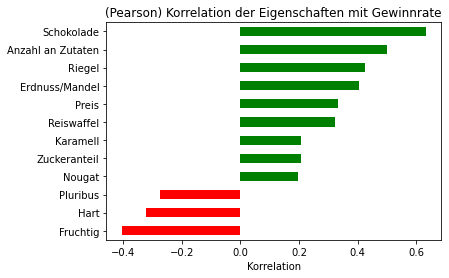

In [27]:
#visualization of correllation in bar chart

#Prepping Data for barplot
dfcorr_win = pd.DataFrame(data=N['Gewinnrate'])
dfcorr_win = dfcorr_win.sort_values(by=['Gewinnrate'])
dfcorr_win = dfcorr_win.drop('Gewinnrate', axis=0)

# add to x-label and y-label to the plot
plt.xlabel('Korrelation') 


#Plot title
plt.title('(Pearson) Korrelation der Eigenschaften mit Gewinnrate')

#Plotting Data
dfcorr_win['Gewinnrate'].plot(kind='barh', color=(dfcorr_win['Gewinnrate'] > 0).map({True: 'G',False: 'r'}))

Text(0.5, 1.0, '(Pearson) Korrelationsmatrix aller Eigenschaften')

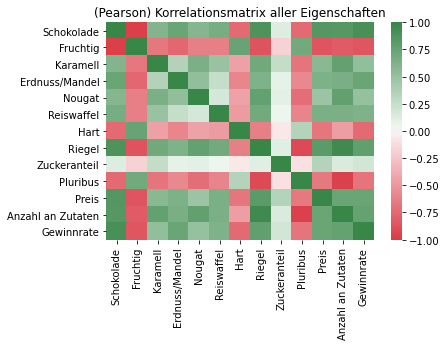

In [28]:
#Creating Red-green Correlation Heatmap
cmap = sns.diverging_palette(10, 133, as_cmap=True)
sns.heatmap(N.corr(method='pearson'), vmin=-1, vmax=1, center= 0, cmap=cmap)
plt.title('(Pearson) Korrelationsmatrix aller Eigenschaften')

### (3.4) K-Means Clustering

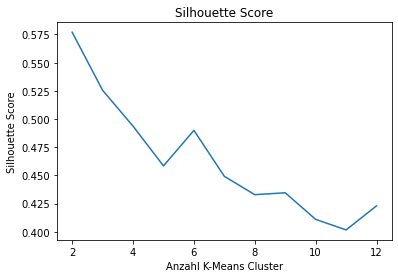

In [29]:
#Silhouette Ceofficient: Implicates how close one cluster is to other clusters.
# Near 1 - CLuster is far away from Neighbouring Clusters and clearly distinguishable.
# Near 0 - On the Verge of not being distinguishable
# <0 - Samples may have been assigned to wrong clusters


# silhouette scores to choose number of clusters.
from sklearn.metrics import silhouette_score
def sil_score(df):
    sse_ = []
    for k in range(2, 13):
        kmeans = KMeans(n_clusters=k, random_state=123).fit(df) # fit.
        sse_.append([k, silhouette_score(df, kmeans.labels_)])
    plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1])
    
    #Plot title
    plt.title('Silhouette Score')
    
    #Plot x and y lables
    plt.ylabel('Silhouette Score')
    plt.xlabel('Anzahl K-Means Cluster') 

sil_score(df)

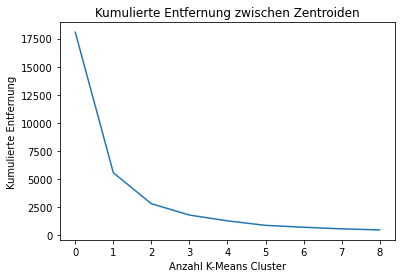

In [30]:
#ELbow Method: Where rate of decrease sharply shifts.
#Effectiveness of k-means algorithm measured in distance 
#from data points to centroids
#Elbow Point at 2 or 3

def plot_ssd(df):
    ssd = []
    for num_clusters in list(range(1,10)):
        model_clus = KMeans(n_clusters = num_clusters, max_iter=50, random_state=123)
        model_clus.fit(df)
        ssd.append(model_clus.inertia_)
    plt.plot(ssd)
    
    #Plot title
    plt.title('Kumulierte Entfernung zwischen Zentroiden')
    
    #Plot x and y lables
    plt.ylabel('Kumulierte Entfernung')
    plt.xlabel('Anzahl K-Means Cluster')

plot_ssd(df)

In [31]:
#Assigning data to X and y
X = df[['chocolate','fruity','caramel', 'peanutyalmondy', 'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus', 'sugarpercent', 'price', 'number ingredients' ]].values
y = df['winpercent'].values

In [32]:
#Transforming pandas dataframe to numpy array
X = np.nan_to_num(X)

#Fitting Dataset
Clus_dataSet = StandardScaler().fit_transform(X)

#### (3.5.1) Cluster Analysis with 2 - 6 Clusters

In [33]:
#Defining Clusteranalysis function
def clusteranalysis(clusterNum, n_init):
    
    #defining X anew
    X = df[['chocolate','fruity','caramel', 'peanutyalmondy', 'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus', 'sugarpercent', 'price', 'number ingredients' ]].values
    
    #Initiating k-means model
    k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = n_init)

    #Fitting Model and making array with cluster numbers
    k_means.fit(X)
    labels = k_means.labels_
  
    #Merging Cluster Array with Halloween Candy in df
    dfclus = df
    dfclus['Cluster'] = labels

    #Creating single dfs for each cluster
    for a in range(clusterNum):
        dfc = dfclus[df['Cluster'] == a]
        dfm = dfc.mean()
        print('Total Number of Candy in Cluster ', a,': ',dfc.shape[0])
        print('Average Attribute Values of Cluster ',a,':')
        print(dfm)
        print('')
        print('---------------------------------------------------------------------------------------------')
        print('');


In [34]:
#K-Means Clusteranalysis with K=2 and Iterations=20
clusteranalysis(2,20)

Total Number of Candy in Cluster  0 :  22
Average Attribute Values of Cluster  0 :
chocolate              0.954545
fruity                 0.045455
caramel                0.363636
peanutyalmondy         0.318182
nougat                 0.318182
crispedricewafer       0.272727
hard                   0.045455
bar                    0.954545
pluribus               0.000000
sugarpercent           0.531182
price                  0.346246
winpercent            60.735742
number ingredients     3.272727
Cluster                0.000000
dtype: float64

---------------------------------------------------------------------------------------------

Total Number of Candy in Cluster  1 :  61
Average Attribute Values of Cluster  1 :
chocolate              0.262295
fruity                 0.606557
caramel                0.098361
peanutyalmondy         0.114754
nougat                 0.000000
crispedricewafer       0.016393
hard                   0.229508
bar                    0.000000
pluribus           

In [35]:
#K-Means Clusteranalysis with K=3 and Iterations=20
clusteranalysis (3,20)

Total Number of Candy in Cluster  0 :  21
Average Attribute Values of Cluster  0 :
chocolate              0.952381
fruity                 0.000000
caramel                0.095238
peanutyalmondy         0.333333
nougat                 0.000000
crispedricewafer       0.047619
hard                   0.000000
bar                    0.190476
pluribus               0.619048
sugarpercent           0.460667
price                  0.282336
winpercent            57.182599
number ingredients     1.619048
Cluster                0.000000
dtype: float64

---------------------------------------------------------------------------------------------

Total Number of Candy in Cluster  1 :  18
Average Attribute Values of Cluster  1 :
chocolate              0.944444
fruity                 0.055556
caramel                0.444444
peanutyalmondy         0.388889
nougat                 0.388889
crispedricewafer       0.333333
hard                   0.055556
bar                    0.944444
pluribus           

In [36]:
#K-Means Clusteranalysis with K=4 and Iterations=20
clusteranalysis (4,20)

Total Number of Candy in Cluster  0 :  17
Average Attribute Values of Cluster  0 :
chocolate              0.941176
fruity                 0.000000
caramel                0.470588
peanutyalmondy         0.411765
nougat                 0.411765
crispedricewafer       0.352941
hard                   0.000000
bar                    1.000000
pluribus               0.000000
sugarpercent           0.555529
price                  0.351790
winpercent            63.176105
number ingredients     3.588235
Cluster                0.000000
dtype: float64

---------------------------------------------------------------------------------------------

Total Number of Candy in Cluster  1 :  31
Average Attribute Values of Cluster  1 :
chocolate              0.000000
fruity                 0.774194
caramel                0.064516
peanutyalmondy         0.032258
nougat                 0.000000
crispedricewafer       0.000000
hard                   0.032258
bar                    0.000000
pluribus           

In [37]:
#K-Means Clusteranalysis with K=5 and Iterations=20
clusteranalysis (5,20)

Total Number of Candy in Cluster  0 :  31
Average Attribute Values of Cluster  0 :
chocolate              0.000000
fruity                 0.774194
caramel                0.064516
peanutyalmondy         0.032258
nougat                 0.000000
crispedricewafer       0.000000
hard                   0.032258
bar                    0.000000
pluribus               0.806452
sugarpercent           0.450645
price                  0.163437
winpercent            43.054454
number ingredients     0.903226
Cluster                0.000000
dtype: float64

---------------------------------------------------------------------------------------------

Total Number of Candy in Cluster  1 :  14
Average Attribute Values of Cluster  1 :
chocolate              0.928571
fruity                 0.000000
caramel                0.071429
peanutyalmondy         0.285714
nougat                 0.214286
crispedricewafer       0.214286
hard                   0.000000
bar                    1.000000
pluribus           

In [38]:
#K-Means Clusteranalysis with K=6 and Iterations=20
clusteranalysis (5,20)

Total Number of Candy in Cluster  0 :  15
Average Attribute Values of Cluster  0 :
chocolate              0.066667
fruity                 0.933333
caramel                0.133333
peanutyalmondy         0.000000
nougat                 0.000000
crispedricewafer       0.000000
hard                   0.933333
bar                    0.000000
pluribus               0.466667
sugarpercent           0.525867
price                  0.164384
winpercent            40.829914
number ingredients     2.066667
Cluster                0.000000
dtype: float64

---------------------------------------------------------------------------------------------

Total Number of Candy in Cluster  1 :  14
Average Attribute Values of Cluster  1 :
chocolate              0.928571
fruity                 0.000000
caramel                0.071429
peanutyalmondy         0.285714
nougat                 0.214286
crispedricewafer       0.214286
hard                   0.000000
bar                    1.000000
pluribus           

In [39]:
clusteranalysis (6,20)

Total Number of Candy in Cluster  0 :  24
Average Attribute Values of Cluster  0 :
chocolate              0.000000
fruity                 1.000000
caramel                0.000000
peanutyalmondy         0.000000
nougat                 0.000000
crispedricewafer       0.000000
hard                   0.000000
bar                    0.000000
pluribus               0.791667
sugarpercent           0.419917
price                  0.160449
winpercent            46.083574
number ingredients     1.000000
Cluster                0.000000
dtype: float64

---------------------------------------------------------------------------------------------

Total Number of Candy in Cluster  1 :  14
Average Attribute Values of Cluster  1 :
chocolate              0.928571
fruity                 0.000000
caramel                0.071429
peanutyalmondy         0.285714
nougat                 0.214286
crispedricewafer       0.214286
hard                   0.000000
bar                    1.000000
pluribus           